### Sinem Çevik- 20180808026



# Iris Modified Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import random
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
df=pd.read_csv('irismodified.csv')
df_shuffled=df.sample(frac=1)
labels_iris=df_shuffled.iloc[0:,4].values
labelencoder=LabelEncoder()
labels_iris=labelencoder.fit_transform(labels_iris)
labels_iris
features_iris=df_shuffled.iloc[0:,0:4].values
features_iris_train, features_iris_test, labels_iris_train, labels_iris_test=train_test_split(features_iris, labels_iris, test_size=0.2, random_state=42)
print(features_iris.shape)

(98, 4)


In [ ]:
def train(features,labels,learning_rate=0.001,iteration=10):
  weights=np.zeros(features.shape[1])
  bias=0.0
  for i in range(iteration):
    index=0
    for sample in features:
      delta_weights=learning_rate*(labels[index]-prediction(sample,weights,bias))
      weights+=delta_weights*sample
      bias+=delta_weights
      index+=1
    return weights,bias
def prediction(features,weights,bias):
  calculated_input=np.dot(features,weights)+bias
  pred=np.where(calculated_input>=0.5,1,0)
  #print(pred)
  #print(calculated_input)
  return pred

In [ ]:
weights_final,bias_final=train(features_iris_train,labels_iris_train,learning_rate=0.001,iteration=50)
print(weights_final,bias_final)
errors=[]
error2=0
zipper=zip(features_iris_test,labels_iris_test)
for sample,result in zipper:
  prediction_final=prediction(sample,weights_final,bias_final)
  if prediction_final==result:
    error=0
  else:
    error=1
  errors.append(error)
  error2=error2+error  
print(errors)
print(error2)  

[0.0556 0.0287 0.0363 0.0105] 0.011000000000000003
[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3


In [ ]:
p = Perceptron(random_state=42, max_iter=10, tol=0.001)
p.fit(features_iris_train, labels_iris_train)

sample = random.sample(range(len(features_iris_train)), 10)
for i in sample:
    print(i, p.predict([features_iris_train[i]]))

print(classification_report(p.predict(features_iris_train), labels_iris_train))
print(classification_report(p.predict(features_iris_test), labels_iris_test))

51 [0]
11 [1]
42 [0]
59 [0]
19 [0]
34 [0]
20 [1]
28 [1]
36 [0]
52 [0]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        37
           1       0.92      0.88      0.90        41

    accuracy                           0.90        78
   macro avg       0.90      0.90      0.90        78
weighted avg       0.90      0.90      0.90        78

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# Evaluation
All these measures come with a cost if we predict healthy person as a sick one that little amount of error in our metrics might get us sued.
If I evaluate my outcomes this tells me that my results are as it should be(currently 0.87-1) but to be realistic this does not mean that this is the best possible model. We can not say that with only these metrics.
### Precision 
 Precision shows us the true positives in predicted positives. 
 Meaning TP/(TP+FP)
### Recall 
 Recall shows us the predicted positives in actual positives. 
 Meaning TP/(TP+FN)  
### Accuracy 
 Accuracy shows us the correct predictions among number of prediction made . Meaning (TP+TN)/(TP+TN+FP+FN)



*I could only implement for the irismodified data because iris data has 3 classes I do not know how to train them.

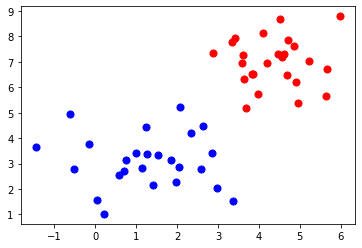

In [ ]:
n_samples = 50
features_iris, labels_iris = make_blobs(n_samples=n_samples, centers=([1.1, 3], [4.5, 6.9]), random_state=0)
colours = ('blue', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(features_iris[labels_iris==n_class][:, 0], 
               features_iris[labels_iris==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

# Convergence
Perceptron is a linear classifier. If I can seperate my data with a hyperplane, it converges. To show you that it converges I used the scatter plot and we can see we can draw a line between them.